In [18]:
# I will build a program that can detect email spam using Natural Language Processing method
# the program will detect if an email is spam (1) or not (0)


# import statements
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [20]:
# load and read the data
df = pd.read_csv("email_spam_detection.txt")
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [22]:
df.shape

(5728, 2)

In [24]:
df.columns

Index(['text', 'spam'], dtype='object')

In [26]:
# let's check if there any duplicate value
df.duplicated().any()

True

In [9]:
# let's remove the duplicated values

df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [10]:
# # let's check if there any missing value
df.isna().any()


text    False
spam    False
dtype: bool

In [11]:
# there is no NAN value

In [12]:
# Let's download the stop words, which mean useless words in natural language processing

# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kempsly\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
# Let's create a function to clean the text and return the tokens

def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [ ]:
# convert the text into a  matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

In [ ]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(message.shape)

In [ ]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [31]:
# prediction
print(classifier.predict(xtrain))
print(ytrain.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [39]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
# print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Accuracy: 
 0.9971466198419666


In [33]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [40]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
# print("Confusion Matrix: \n", confusion_matrix(ytest, pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139




Text(95.72222222222221, 0.5, 'Truth')

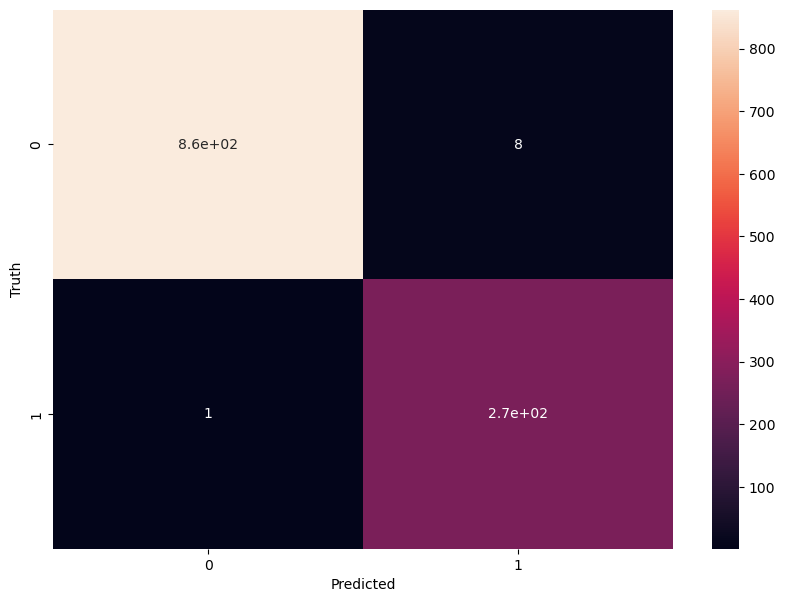

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm= confusion_matrix(ytest, pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# sns.heatmap(confusion_matrix, annot=True)

In [35]:
print("Accuracy: \n", accuracy_score(ytest, pred))

Accuracy: 
 0.9920983318700615
